# Keras classification example

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("E:\\Datasets\\avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## EDA & Data wrangling

In [4]:
df = df.drop(['Unnamed: 0'], axis=1)

In [5]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [6]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


Text(0.5, 0, 'AveragePrice')

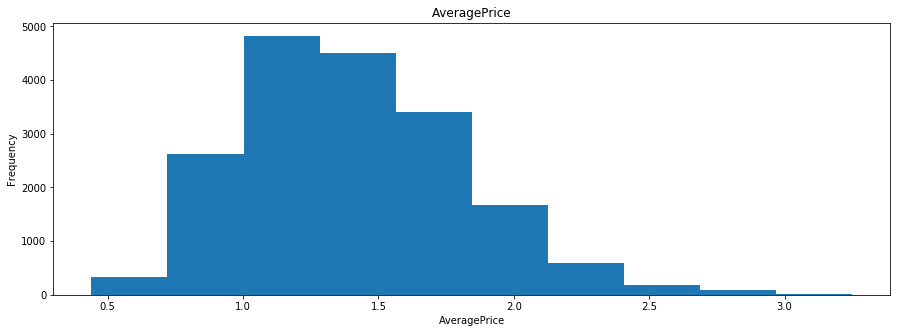

In [7]:
feature = 'AveragePrice'
plt.figure(figsize=(15,5))
df[feature].plot(kind='hist', title=feature)
plt.xlabel(feature)

In [8]:
df['year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

In [9]:
df['region'].value_counts()

PhoenixTucson          338
Syracuse               338
Louisville             338
Pittsburgh             338
GrandRapids            338
Northeast              338
GreatLakes             338
West                   338
Portland               338
LasVegas               338
BuffaloRochester       338
BaltimoreWashington    338
Houston                338
Sacramento             338
California             338
StLouis                338
HartfordSpringfield    338
HarrisburgScranton     338
Detroit                338
NorthernNewEngland     338
CincinnatiDayton       338
Boston                 338
Atlanta                338
Seattle                338
Denver                 338
Boise                  338
Tampa                  338
SanFrancisco           338
Albany                 338
SouthCarolina          338
NewYork                338
RichmondNorfolk        338
Columbus               338
TotalUS                338
Chicago                338
Roanoke                338
Orlando                338
P

### Missings

In [10]:
df.isna().any()

Date            False
AveragePrice    False
Total Volume    False
4046            False
4225            False
4770            False
Total Bags      False
Small Bags      False
Large Bags      False
XLarge Bags     False
type            False
year            False
region          False
dtype: bool

### Binning classification labels

In [11]:
df['AveragePrice'].min()

0.44

In [12]:
df['AveragePrice'].max()

3.25

In [13]:
bins = [0.44,1,1.5,2.0,2.5,3.25]
labels = [0,1,2,3,4]
df['labels'] = pd.cut(df['AveragePrice'], bins = bins, labels= labels)

In [14]:
df['labels'].value_counts()

1    8374
2    5527
0    2962
3    1182
4     203
Name: labels, dtype: int64

In [15]:
df.isna().any()

Date            False
AveragePrice    False
Total Volume    False
4046            False
4225            False
4770            False
Total Bags      False
Small Bags      False
Large Bags      False
XLarge Bags     False
type            False
year            False
region          False
labels           True
dtype: bool

In [16]:
df = df.dropna()
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,labels
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,1
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,1
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,1
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,1


### Dummies

In [17]:
df_num = df[df._get_numeric_data().columns]
df_num.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015


In [18]:
df_cat = df.drop(df._get_numeric_data().columns, axis=1)
df_cat.head()

,Date,type,region,labels
0,2015-12-27,conventional,Albany,1
1,2015-12-20,conventional,Albany,1
2,2015-12-13,conventional,Albany,0
3,2015-12-06,conventional,Albany,1
4,2015-11-29,conventional,Albany,1


In [19]:
df_num['labels'] = df_cat['labels']
df_cat['year'] = df_num['year']
df_cat = df_cat.drop(['labels'], axis=1)
df_num= df_num.drop(['year'], axis=1)

C:\Users\Sampayo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
for i in df_cat.columns:
    keys = df_cat[i].unique()
    values = range(len(keys))
    dictionary = dict(zip(keys, values))
    df_cat[i] = df_cat[i].replace(dictionary)

In [21]:
df_cat.head()

,Date,type,region,year
0,0,0,0,0
1,1,0,0,0
2,2,0,0,0
3,3,0,0,0
4,4,0,0,0


In [22]:
df_final = pd.concat((df_cat,df_num),axis=1)
df_final.head()

,Date,type,region,year,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,labels
0,0,0,0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,1
1,1,0,0,0,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,1
2,2,0,0,0,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0
3,3,0,0,0,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,1
4,4,0,0,0,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,1


In [23]:
df_final['labels'].value_counts()

1    8374
2    5527
0    2962
3    1182
4     203
Name: labels, dtype: int64

### Sampling equal number of data rows based on labels count

In [24]:
count_class_1, count_class_2,count_class_0,count_class_3,count_class_4 = df_final['labels'].value_counts()

In [25]:
df_class_0 = df_final[df_final['labels'] == 0]
df_class_1 = df_final[df_final['labels'] == 1]
df_class_2 = df_final[df_final['labels'] == 2]
df_class_3 = df_final[df_final['labels'] == 3]
df_class_4 = df_final[df_final['labels'] == 4]

Random under-sampling:
4    203
3    203
2    203
1    203
0    203
Name: labels, dtype: int64


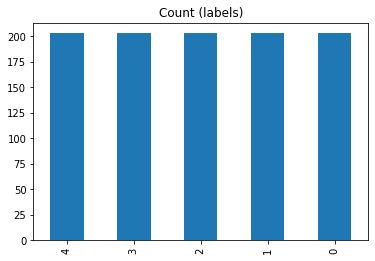

In [36]:
df_class_0_under = df_class_0.sample(count_class_4)
df_class_1_under = df_class_1.sample(count_class_4)
df_class_2_under = df_class_2.sample(count_class_4)
df_class_3_under = df_class_3.sample(count_class_4)
df_class_4_under = df_class_4.sample(count_class_4)

df_final_balanced = pd.concat([df_class_0_under, df_class_1_under, df_class_2_under,df_class_3_under ,df_class_4_under], axis=0)

print('Random under-sampling:')
print(df_final_balanced.labels.value_counts())

df_final_balanced.labels.value_counts().plot(kind='bar', title='Count (labels)');

## Classification

#### Normalize data

In [38]:
df_final_balanced

,Date,type,region,year,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,labels
8363,148,0,51,2,0.99,37007797.69,13173668.36,11398142.68,896761.77,11539224.88,8945888.88,2405733.76,187602.24,0
1424,20,0,27,0,1.00,272464.74,171948.43,10121.42,11932.03,78462.86,71332.39,7130.47,0.00,0
1984,8,0,38,0,1.00,212854.47,72020.73,93880.64,16391.80,30561.30,29676.86,884.44,0.00,0
15265,151,1,9,2,0.57,25068.02,198.33,4655.41,0.00,20214.28,458.06,19756.22,0.00,0
605,33,0,11,0,0.75,1298826.19,817727.07,357330.30,7803.87,115964.95,107302.84,8644.44,17.67,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17240,112,1,47,2,2.54,2596.51,215.25,1023.49,0.00,1357.77,380.00,977.77,0.00,4
14122,57,1,42,1,2.94,17436.41,5926.88,7823.25,0.00,3686.28,3620.25,66.03,0.00,4
16996,133,1,42,2,2.77,25806.28,10768.91,11690.84,4.37,3342.16,3338.11,4.05,0.00,4
12823,58,1,17,1,2.68,5260.62,15.23,3074.13,20.77,2150.49,2142.80,7.69,0.00,4


In [37]:
df_final_balanced.columns

Index(['Date', 'type', 'region', 'year', 'AveragePrice', 'Total Volume',
       '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags',
       'XLarge Bags', 'labels'],
      dtype='object')

In [45]:
from sklearn import preprocessing
X = preprocessing.normalize(df_final_balanced.drop(['labels'], axis=1))
y = df_final_balanced['labels'].values

In [46]:
X

array([[3.40175970e-06, 0.00000000e+00, 1.17222801e-06, ...,
        2.05620029e-01, 5.52954606e-02, 4.31201176e-03],
       [5.88888506e-05, 0.00000000e+00, 7.94999483e-05, ...,
        2.10034123e-01, 2.09952591e-02, 0.00000000e+00],
       [3.22875366e-05, 0.00000000e+00, 1.53365799e-04, ...,
        1.19774088e-01, 3.56954861e-03, 0.00000000e+00],
       ...,
       [4.33581026e-03, 3.26000771e-05, 1.36920324e-03, ...,
        1.08822643e-01, 1.32030312e-04, 0.00000000e+00],
       [8.51974577e-03, 1.46892168e-04, 2.49716686e-03, ...,
        3.14760539e-01, 1.12960078e-03, 0.00000000e+00],
       [1.67266192e-02, 1.40559826e-04, 4.35735459e-03, ...,
        2.41793823e-01, 2.39376194e-01, 0.00000000e+00]])

In [47]:
y

[0, 0, 0, 0, 0, ..., 4, 4, 4, 4, 4]
Length: 1015
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

#### Model

In [77]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

n_features = len(df_final_balanced.columns)-1
model = Sequential()
model.add(Dense(1, input_shape=(n_features,)))
model.compile(Adam(lr=0.8), 'mean_squared_error')

#### Train and Test split

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [79]:
len(X_train)

812

#### Train model

In [80]:
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
812/812 [==============================] - 0s 129us/step - loss: 2.5147
Epoch 2/100
812/812 [==============================] - 0s 18us/step - loss: 1.4977
Epoch 3/100
812/812 [==============================] - 0s 18us/step - loss: 1.4111
Epoch 4/100
812/812 [==============================] - 0s 17us/step - loss: 1.4134
Epoch 5/100
812/812 [==============================] - 0s 17us/step - loss: 1.4711
Epoch 6/100
812/812 [==============================] - 0s 17us/step - loss: 1.4466
Epoch 7/100
812/812 [==============================] - 0s 17us/step - loss: 1.4519
Epoch 8/100
812/812 [==============================] - 0s 18us/step - loss: 1.6448
Epoch 9/100
812/812 [==============================] - 0s 17us/step - loss: 1.5625
Epoch 10/100
812/812 [==============================] - 0s 18us/step - loss: 1.4062
Epoch 11/100
812/812 [==============================] - 0s 20us/step - loss: 1.4242
Epoch 12/100
812/812 [==============================] - 0s 18us/step - loss: 1.4164


812/812 [==============================] - 0s 18us/step - loss: 1.4052
Epoch 99/100
812/812 [==============================] - 0s 20us/step - loss: 1.3484
Epoch 100/100
812/812 [==============================] - 0s 20us/step - loss: 1.3804


In [81]:
from sklearn.metrics import r2_score

y_train_pred =  model.predict(X_train)
y_test_pred =  model.predict(X_test)

print('Train r2 score')
print(r2_score(y_train, y_train_pred))
print('Test r2 score')
print(r2_score(y_test, y_test_pred))

Train r2 score
0.30036727579264144
Test r2 score
0.23774416590720182


#### Testing with different model set

In [82]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

n_features = len(df_final_balanced.columns)-1
model = Sequential()
model.add(Dense(1, input_shape=(n_features,)))
model.compile(Adam(lr=0.1), 'mean_squared_error')

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [84]:
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
812/812 [==============================] - 0s 140us/step - loss: 2.9321
Epoch 2/100
812/812 [==============================] - 0s 20us/step - loss: 1.7973
Epoch 3/100
812/812 [==============================] - 0s 18us/step - loss: 1.6411
Epoch 4/100
812/812 [==============================] - 0s 18us/step - loss: 1.5624
Epoch 5/100
812/812 [==============================] - 0s 18us/step - loss: 1.5501
Epoch 6/100
812/812 [==============================] - 0s 18us/step - loss: 1.5186
Epoch 7/100
812/812 [==============================] - 0s 18us/step - loss: 1.5036
Epoch 8/100
812/812 [==============================] - 0s 18us/step - loss: 1.5029
Epoch 9/100
812/812 [==============================] - 0s 18us/step - loss: 1.4943
Epoch 10/100
812/812 [==============================] - 0s 20us/step - loss: 1.4746
Epoch 11/100
812/812 [==============================] - 0s 18us/step - loss: 1.4788
Epoch 12/100
812/812 [==============================] - 0s 20us/step - loss: 1.4480


812/812 [==============================] - 0s 20us/step - loss: 1.3800
Epoch 99/100
812/812 [==============================] - 0s 21us/step - loss: 1.4060
Epoch 100/100
812/812 [==============================] - 0s 20us/step - loss: 1.4620


In [85]:
from sklearn.metrics import r2_score

y_train_pred =  model.predict(X_train)
y_test_pred =  model.predict(X_test)

print('Train r2 score')
print(r2_score(y_train, y_train_pred))
print('Test r2 score')
print(r2_score(y_test, y_test_pred))

Train r2 score
0.2635767549348831
Test r2 score
0.32202540641888255


### Trying with different bins to have more data (previously we miss lots of data due to balance the classes 

Text(0.5, 0, 'AveragePrice')

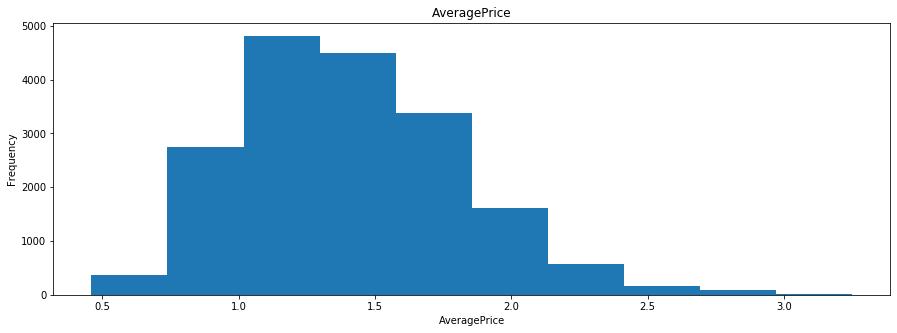

In [87]:
feature = 'AveragePrice'
plt.figure(figsize=(15,5))
df[feature].plot(kind='hist', title=feature)
plt.xlabel(feature)

In [209]:
labels = [0,1,2]
df['labels'] = pd.cut(df['AveragePrice'], bins = 3, labels= labels)

In [210]:
df['labels'].value_counts()

0    9486
1    8355
2     407
Name: labels, dtype: int64

In [211]:
df.isna().any()

Date            False
AveragePrice    False
Total Volume    False
4046            False
4225            False
4770            False
Total Bags      False
Small Bags      False
Large Bags      False
XLarge Bags     False
type            False
year            False
region          False
labels          False
dtype: bool

In [212]:
df = df.dropna()
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,labels
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,0


### Dummies

In [213]:
df_num = df[df._get_numeric_data().columns]
df_num.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015


In [214]:
df_cat = df.drop(df._get_numeric_data().columns, axis=1)
df_cat.head()

,Date,type,region,labels
0,2015-12-27,conventional,Albany,0
1,2015-12-20,conventional,Albany,0
2,2015-12-13,conventional,Albany,0
3,2015-12-06,conventional,Albany,0
4,2015-11-29,conventional,Albany,0


In [215]:
df_num['labels'] = df_cat['labels']
df_cat['year'] = df_num['year']
df_cat = df_cat.drop(['labels'], axis=1)
df_num= df_num.drop(['year'], axis=1)

C:\Users\Sampayo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [216]:
for i in df_cat.columns:
    keys = df_cat[i].unique()
    values = range(len(keys))
    dictionary = dict(zip(keys, values))
    df_cat[i] = df_cat[i].replace(dictionary)

In [217]:
df_cat.head()

,Date,type,region,year
0,0,0,0,0
1,1,0,0,0
2,2,0,0,0
3,3,0,0,0
4,4,0,0,0


In [218]:
df_final = pd.concat((df_cat,df_num),axis=1)
df_final.head()

,Date,type,region,year,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,labels
0,0,0,0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0
1,1,0,0,0,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0
2,2,0,0,0,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0
3,3,0,0,0,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0
4,4,0,0,0,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0


In [219]:
df_final['labels'].value_counts()

0    9486
1    8355
2     407
Name: labels, dtype: int64

### Sampling equal number of data rows based on labels count

In [224]:
count_class_0, count_class_1, count_class_2 = df_final['labels'].value_counts()

In [225]:
df_class_0 = df_final[df_final['labels'] == 0]
df_class_1 = df_final[df_final['labels'] == 1]
df_class_2 = df_final[df_final['labels'] == 2]

Random under-sampling:
2    407
1    407
0    407
Name: labels, dtype: int64


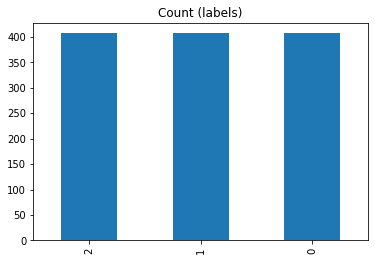

In [226]:
df_class_0_under = df_class_0.sample(count_class_2)
df_class_1_under = df_class_1.sample(count_class_2)
df_class_2_under = df_class_2.sample(count_class_2)


df_final_balanced = pd.concat([df_class_0_under, df_class_1_under, df_class_2_under], axis=0)

print('Random under-sampling:')
print(df_final_balanced.labels.value_counts())

df_final_balanced.labels.value_counts().plot(kind='bar', title='Count (labels)');

## Classification

#### Normalize data

In [227]:
df_final_balanced

,Date,type,region,year,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,labels
6867,136,0,23,2,1.10,104440.16,2090.74,51642.32,225.38,50481.72,14518.52,35959.83,3.37,0
4941,53,0,41,1,0.90,437170.79,106000.40,161104.63,14145.04,155920.72,115858.84,38951.60,1110.28,0
1427,23,0,27,0,0.98,258559.32,167068.14,8930.71,11720.44,70840.03,62702.44,8131.55,6.04,0
8003,106,0,45,2,0.90,4951756.35,2460827.88,956506.58,17333.23,1517088.66,1167760.58,349011.06,317.02,0
3064,100,0,4,1,1.05,670376.77,3107.96,482030.79,26052.91,159185.11,158806.43,378.68,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12851,86,1,17,1,2.40,13840.67,105.24,6947.38,0.00,6788.05,6560.10,227.95,0.00,2
12837,72,1,17,1,2.36,5402.37,35.74,3832.23,2.73,1531.67,1531.67,0.00,0.00,2
17256,128,1,47,2,2.55,3536.14,324.26,1828.38,4.18,1379.32,105.55,1273.77,0.00,2
14909,113,1,3,2,2.34,1962.54,51.96,511.36,0.00,1399.22,382.29,1016.93,0.00,2


In [228]:
df_final_balanced.columns

Index(['Date', 'type', 'region', 'year', 'AveragePrice', 'Total Volume',
       '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags',
       'XLarge Bags', 'labels'],
      dtype='object')

In [229]:
from sklearn import preprocessing
X = preprocessing.normalize(df_final_balanced.drop(['labels'], axis=1))
y = df_final_balanced['labels'].values

In [230]:
X

array([[1.02422480e-03, 0.00000000e+00, 1.73214488e-04, ...,
        1.09339913e-01, 2.70815806e-01, 2.53796880e-05],
       [1.02423888e-04, 0.00000000e+00, 7.92335735e-05, ...,
        2.23900242e-01, 7.52749869e-02, 2.14564517e-03],
       [7.13207127e-05, 0.00000000e+00, 8.37243149e-05, ...,
        1.94434031e-01, 2.52151279e-02, 1.87294393e-05],
       ...,
       [2.89809567e-02, 2.26413724e-04, 1.06414450e-02, ...,
        2.38979686e-02, 2.88399010e-01, 0.00000000e+00],
       [4.19190409e-02, 3.70964963e-04, 1.11289489e-03, ...,
        1.41816196e-01, 3.77245400e-01, 0.00000000e+00],
       [6.25532608e-03, 5.12731646e-05, 8.71643798e-04, ...,
        4.58150849e-01, 0.00000000e+00, 0.00000000e+00]])

In [231]:
y

[0, 0, 0, 0, 0, ..., 2, 2, 2, 2, 2]
Length: 1221
Categories (3, int64): [0 < 1 < 2]

#### Model

In [232]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

n_features = len(df_final_balanced.columns)-1
model = Sequential()
model.add(Dense(1, input_shape=(n_features,)))
model.compile(Adam(lr=0.8), 'mean_squared_error')

#### Train and Test split

In [233]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

In [234]:
len(X_train)

854

#### Train model

In [237]:
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
854/854 [==============================] - 0s 23us/step - loss: 0.5087
Epoch 2/100
854/854 [==============================] - 0s 21us/step - loss: 0.5012
Epoch 3/100
854/854 [==============================] - 0s 19us/step - loss: 0.5927
Epoch 4/100
854/854 [==============================] - 0s 20us/step - loss: 0.5852
Epoch 5/100
854/854 [==============================] - 0s 20us/step - loss: 0.5472
Epoch 6/100
854/854 [==============================] - 0s 20us/step - loss: 0.6466
Epoch 7/100
854/854 [==============================] - 0s 20us/step - loss: 0.4978
Epoch 8/100
854/854 [==============================] - 0s 20us/step - loss: 0.5150
Epoch 9/100
854/854 [==============================] - 0s 20us/step - loss: 0.5322
Epoch 10/100
854/854 [==============================] - 0s 20us/step - loss: 0.5475
Epoch 11/100
854/854 [==============================] - 0s 21us/step - loss: 0.5480
Epoch 12/100
854/854 [==============================] - 0s 20us/step - loss: 0.5350
E

854/854 [==============================] - 0s 20us/step - loss: 0.5608
Epoch 99/100
854/854 [==============================] - 0s 20us/step - loss: 0.5534
Epoch 100/100
854/854 [==============================] - 0s 21us/step - loss: 0.5392


In [238]:
from sklearn.metrics import r2_score

y_train_pred =  model.predict(X_train)
y_test_pred =  model.predict(X_test)

print('Train r2 score')
print(r2_score(y_train, y_train_pred))
print('Test r2 score')
print(r2_score(y_test, y_test_pred))

Train r2 score
0.25118598946422765
Test r2 score
0.23595234104198748


#### Testing with different model set

In [239]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

n_features = len(df_final_balanced.columns)-1
model = Sequential()
model.add(Dense(1, input_shape=(n_features,)))
model.compile(Adam(lr=0.1), 'mean_squared_error')

In [240]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [241]:
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
976/976 [==============================] - 0s 189us/step - loss: 0.7251
Epoch 2/100
976/976 [==============================] - 0s 22us/step - loss: 0.5449
Epoch 3/100
976/976 [==============================] - 0s 24us/step - loss: 0.5139
Epoch 4/100
976/976 [==============================] - 0s 21us/step - loss: 0.5097
Epoch 5/100
976/976 [==============================] - 0s 17us/step - loss: 0.5143
Epoch 6/100
976/976 [==============================] - 0s 19us/step - loss: 0.4910
Epoch 7/100
976/976 [==============================] - 0s 19us/step - loss: 0.4827
Epoch 8/100
976/976 [==============================] - 0s 23us/step - loss: 0.4912
Epoch 9/100
976/976 [==============================] - 0s 22us/step - loss: 0.4781
Epoch 10/100
976/976 [==============================] - 0s 20us/step - loss: 0.4748
Epoch 11/100
976/976 [==============================] - 0s 23us/step - loss: 0.4717
Epoch 12/100
976/976 [==============================] - 0s 23us/step - loss: 0.4709


976/976 [==============================] - 0s 20us/step - loss: 0.4679
Epoch 99/100
976/976 [==============================] - 0s 19us/step - loss: 0.4780
Epoch 100/100
976/976 [==============================] - 0s 18us/step - loss: 0.4688


In [242]:
from sklearn.metrics import r2_score

y_train_pred =  model.predict(X_train)
y_test_pred =  model.predict(X_test)

print('Train r2 score')
print(r2_score(y_train, y_train_pred))
print('Test r2 score')
print(r2_score(y_test, y_test_pred))

Train r2 score
0.29498071449290775
Test r2 score
0.1851645752364376


We can finally say that the binning is a problem in this dataset or maybe the little amount of trained data to maintain balanced classes although the propose of this example it's only to how use Keras with classification problems.